<a href="https://colab.research.google.com/github/gino79445/hellish-IWT-memes-classifier/blob/main/hell_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/meme

/content/drive/MyDrive/Colab Notebooks/meme


In [ ]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 512 kB 6.2 MB/s 


In [ ]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
plt.ion()   # interactive mode
#os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,2"
from torchvision.models.resnet import Bottleneck
import torchvision.models as models
import math
import torch.utils.model_zoo as model_zoo
from gensim.models import word2vec
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
# import torchmetrics 

data process
-------------------------------

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('./training/hell_label.csv')
# df = pd.read_csv('./training/label_hell.csv')
# df=df.sample(frac=1.0)
# df.to_csv("hell_npy_val/hell_label.csv", index=False)
# np.save( "hell_npy_val/df.npy" ,df )
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1422 non-null   object
 1   class    1422 non-null   int64 
 2   context  1201 non-null   object
dtypes: int64(1), object(2)
memory usage: 33.5+ KB
None
                          id  class  \
0           mybosseatshit392      1   
1           mybosseatshit539      1   
2  memes_lead_you_to_hell334      0   
3           mybosseatshit342      1   
4           mybosseatshit304      1   

                                             context  
0                  你的朋友不就只有我一個嗎It@MYBOSSERTSHHT上班偷摸魚  
1                                               $999  
2           醫生:你的明天會像JOHNCENA女孩:什麼意思?醫生:你看不到他選陳呈點l檔【  
3  如何避免被女生說成“媽寶”你可以把“我媽說”改成“家裡有要求”,這樣就會顯得比較有家教。再進...  
4                               當天氣太熱讓你不想抱抱但你依然想碰男朋友  


In [ ]:
# df = np.load("hell_npy_val/df.npy",allow_pickle=True)
# print(df)


[['mybosseatshit392' 1 '你的朋友不就只有我一個嗎It@MYBOSSERTSHHT上班偷摸魚']
 ['mybosseatshit539' 1 '$999']
 ['memes_lead_you_to_hell334' 0
  '醫生:你的明天會像JOHNCENA女孩:什麼意思?醫生:你看不到他選陳呈點l檔【']
 ...
 ['memes_lead_you_to_hell90' 0 'Ba預告了八點要自殺炸彈攻擊起床時已經七點五十五分']
 ['hell_meme_ig199' 0 '我在搞笑侈商笑嗎?']
 ['hell_meme_ig309' 0 '當你想要新的哀鳳但你發現你只剩下一顆腎']]


In [ ]:
from pandas import Series,DataFrame

clas = df['class']
clas_np = clas.values
print(type(clas_np) )
print(clas_np.shape)   #(10222,)

#種類數
clas_set = set(clas_np)
print(len(clas_set))   

#編號與名稱對應字典：
clas_list = list(clas_set)
dic = {}
for i in range(2):
    dic[  clas_list[i]   ] = i
print(dic)

<class 'numpy.ndarray'>
(1422,)
2
{0: 0, 1: 1}


In [ ]:
file =  df["id"].values
print(file.shape)
from random import shuffle
import os
file = [i+".jpg" for i in file]

file = [os.path.join("./training/train",i) for i in file ]
file_train1 = file[:1200]
file_test1 = file[1200:]
file_train2 = file[:900] + file[1200:]
file_test2 = file[900:1200]
file_train3 = file[:600] + file[900:]
file_test3 = file[600:900]
file_train4 = file[:300] + file[600:]
file_test4 = file[300:600]
file_train5 = file[300:]
file_test5 = file[0:300]

np.save( "hell_npy_val/file_train1.npy" ,file_train1 )
np.save( "hell_npy_val/file_test1.npy" ,file_test1 )
np.save( "hell_npy_val/file_train2.npy" ,file_train2 )
np.save( "hell_npy_val/file_test2.npy" ,file_test2 )
np.save( "hell_npy_val/file_train3.npy" ,file_train3 )
np.save( "hell_npy_val/file_test3.npy" ,file_test3 )
np.save( "hell_npy_val/file_train4.npy" ,file_train4 )
np.save( "hell_npy_val/file_test4.npy" ,file_test4 )
np.save( "hell_npy_val/file_train5.npy" ,file_train5 )
np.save( "hell_npy_val/file_test5.npy" ,file_test5 )

(1422,)


In [ ]:
clas = df["class"].values
# print(clas)
number = []
for i in range(1422):
  # print(clas[i])
  number.append(  dic[ clas[i] ]  )
# number = np.array(number) 
print(number)


number_train1 = number[:1200]
number_test1 = number[1200:]
number_train2 = number[:900] + number[1200:]
number_test2 = number[900:1200]
number_train3 = number[:600] + number[900:]
number_test3 = number[600:900]
number_train4 = number[:300] + number[600:]
number_test4 = number[300:600]
number_train5 = number[300:]
number_test5 = number[0:300]

np.save( "hell_npy_val/number_train1.npy" ,number_train1 )
np.save( "hell_npy_val/number_test1.npy" ,number_test1 )
np.save( "hell_npy_val/number_train2.npy" ,number_train2 )
np.save( "hell_npy_val/number_test2.npy" ,number_test2 )
np.save( "hell_npy_val/number_train3.npy" ,number_train3 )
np.save( "hell_npy_val/number_test3.npy" ,number_test3 )
np.save( "hell_npy_val/number_train4.npy" ,number_train4 )
np.save( "hell_npy_val/number_test4.npy" ,number_test4 )
np.save( "hell_npy_val/number_train5.npy" ,number_train5 )
np.save( "hell_npy_val/number_test5.npy" ,number_test5 )

[1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 

In [ ]:
file =  df["id"].values
print(file.shape)
from random import shuffle
import os
file = [i+".npy" for i in file]

file = [os.path.join("./context_bert_hell",i) for i in file ]
print(file)
# np.load('my_array.npy')
l = []
for i in file:
  n =np.load(i)
  l.append(n)
  # print(n)



context_train1 = l[:1200]
context_test1 = l[1200:]
context_train2 = l[:900] + l[1200:]
context_test2 = l[900:1200]
context_train3 = l[:600] + l[900:]
context_test3 = l[600:900]
context_train4 = l[:300] + l[600:]
context_test4 = l[300:600]
context_train5 = l[300:]
context_test5 = l[0:300]

np.save( "hell_npy_val/context.npy" ,l)
np.save( "hell_npy_val/context_train1.npy" ,context_train1 )
np.save( "hell_npy_val/context_test1.npy" ,context_test1 )
np.save( "hell_npy_val/context_train2.npy" ,context_train2 )
np.save( "hell_npy_val/context_test2.npy" ,context_test2 )
np.save( "hell_npy_val/context_train3.npy" ,context_train3 )
np.save( "hell_npy_val/context_test3.npy" ,context_test3 )
np.save( "hell_npy_val/context_train4.npy" ,context_train4 )
np.save( "hell_npy_val/context_test4.npy" ,context_test4 )
np.save( "hell_npy_val/context_train5.npy" ,context_train5 )
np.save( "hell_npy_val/context_test5.npy" ,context_test5 )




(1422,)
['./context_bert_hell/mybosseatshit392.npy', './context_bert_hell/mybosseatshit539.npy', './context_bert_hell/memes_lead_you_to_hell334.npy', './context_bert_hell/mybosseatshit342.npy', './context_bert_hell/mybosseatshit304.npy', './context_bert_hell/hell_fun_www9.npy', './context_bert_hell/mybosseatshit453.npy', './context_bert_hell/mybosseatshit168.npy', './context_bert_hell/mybosseatshit190.npy', './context_bert_hell/mybosseatshit174.npy', './context_bert_hell/memes_lead_you_to_hell1.npy', './context_bert_hell/mybosseatshit790.npy', './context_bert_hell/hell_meme_ig186.npy', './context_bert_hell/memes_lead_you_to_hell327.npy', './context_bert_hell/hell_meme_ig361.npy', './context_bert_hell/hell_meme_ig51.npy', './context_bert_hell/mybosseatshit53.npy', './context_bert_hell/mybosseatshit399.npy', './context_bert_hell/mybosseatshit288.npy', './context_bert_hell/mybosseatshit512.npy', './context_bert_hell/hell_meme_ig285.npy', './context_bert_hell/memes_lead_you_to_hell95.npy',

Layer
-----------------------------------

In [ ]:
class HELLMEMECLASS(nn.Module):
 
    def __init__(self, block, layers, num_classes=2):
        self.inplanes = 64
        super(HELLMEMECLASS, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3,
                               bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)
        # self.avgpool = nn.AvgPool2d(7, stride=1)
        # # #新增一個反捲積層
        # # self.convtranspose1 = nn.ConvTranspose2d(2048, 2048, kernel_size=3, stride=1, padding=1, output_padding=0, groups=1, bias=False, dilation=1)
        # # #新增一個最大池化層
        # # self.maxpool2 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        # #去掉原來的fc層，新增一個fclass層
        # self.fclass = nn.Linear(2048, num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
    
        self.fc1 = nn.Linear(2816, 200)
        self.relu1 = nn.ReLU()
        self.bn11 = nn.BatchNorm1d(200 )

        # self.fc2 = nn.Linear(600,400,bias=True)
        # self.relu2 = nn.ReLU()
        # self.bn2 = nn.BatchNorm1d(400)

        # self.fc3 = nn.Linear(400,200,bias=True)
        # self.relu3 = nn.ReLU()
        # self.bn3 = nn.BatchNorm1d(200)

        # self.fc4 = nn.Linear(200,100,bias=True)
        # self.relu4 = nn.ReLU()
        # self.bn4 = nn.BatchNorm1d(100)

    
        # self.fc5 = nn.Linear(100,400,bias=True)
        # self.relu5 = nn.ReLU()
        # self.bn5 = nn.BatchNorm1d(400)
        
        # self.fc6 = nn.Linear(400,200,bias=True)
        # self.relu6 = nn.ReLU()
        # self.bn6 = nn.BatchNorm1d(200)

        self.fc7 = nn.Linear(200,2,bias =True)
        self.sigmoid = nn.Sigmoid()
 
    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes * block.expansion),
            )
 
        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))
 
        return nn.Sequential(*layers)
 
    def forward(self, x,y):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
 
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
 
        x = self.avgpool(x)
        #新加層的forward
        # x = x.view(x.size(0), -1)
        # x = self.convtranspose1(x)
        # x = self.maxpool2(x)
        # x = x.view(x.size(0), -1)
        # x = self.fclass(x)
        
        
        x = torch.flatten(x, 1)
        # y.resize_(x.size(dim = 0), 1) 
        # y = y.to(torch.float)
        # x = torch.cat([x,y],1) # concatenate two tensor according to second dimension
        
        # y = torch.mean(y,1)
        # print(y.size())
        y = y.to(torch.float)

        x = torch.cat([x,y],1) # concatenate two tensor according to second dimension
        
        # print(y)
        
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.bn11(x)

        # x = self.fc2(x)
        # x = self.relu2(x)
        # x = self.bn2(x)

        # x = self.fc3(x)
        # x = self.relu3(x)
        # x = self.bn3(x)

        # x = self.fc4(x)
        # x = self.relu4(x)
        # x = self.bn4(x)


        # x = self.fc5(x)
        # x = self.relu5(x)
        # x = self.bn5(x)

        # x = self.fc6(x)
        # x = self.relu6(x)
        # x = self.bn6(x)


        x = self.fc7(x)
        x = self.sigmoid(x)
        

        return x


          

def train_model(model, criterion, device, dataloaders, dataset_sizes, optimizer, scheduler, num_epochs=25):
    since = time.time()
    # 
   
    # 

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    train_loss, valid_loss = [], []
    train_acc, valid_acc = [], []

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0
            FN =0.0      

            FP =0.0

            TP =0.0  
            TN =0.0
            # Iterate over data.
            for inputs, labels ,contexts in dataloaders[phase]:
                # print(inputs)
                # print(labels)
                # print(phase)
                # print(comment)
                # print()
               
               
                inputs = inputs.to(device)
                labels = labels.to(device)
                contexts = contexts.to(device)

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):

                    outputs = model(inputs,contexts)
                    # print(outputs)
                    val, preds = torch.max(outputs, 1)
                    # print(preds)
                      
                    loss = criterion(outputs, labels)
                    # =======================
                    # print(labels.data)
                    zes=(torch.zeros(len(labels.data)).type(torch.LongTensor))#全0变量
                    zes=zes.to(device)
                    ons=(torch.ones(len(labels.data)).type(torch.LongTensor))#全1变量
                    ons=ons.to(device)
                    train_correct01 = ((preds==ons)&(labels.data==zes)).sum() #原标签为T，预测为 F 的总数

                    train_correct10 = ((preds==zes)&(labels.data==ons)).sum() #原标签为F，预测为 T 的总数

                    train_correct11 = ((preds==zes)&(labels.data==zes)).sum()
                    
                    train_correct00 = ((preds==ons)&(labels.data==ons)).sum()

                    #  zes=(torch.zeros(len(labels.data)).type(torch.LongTensor))#全0变量
                    # zes=zes.to(device)
                    # ons=(torch.ones(len(labels.data)).type(torch.LongTensor))#全1变量
                    # ons=ons.to(device)
                    # train_correct01 = ((preds==zes)&(labels.data==ons)).sum() #原标签为T，预测为 F 的总数

                    # train_correct10 = ((preds==ons)&(labels.data==zes)).sum() #原标签为F，预测为 T 的总数

                    # train_correct11 = ((preds==ons)&(labels.data==ons)).sum()
                    
                    # train_correct00 = ((preds==zes)&(labels.data==zes)).sum()

                    # ======================================
                    # backward + optimize only if in training phase
                    if phase == 'train':
                        # zero the parameter gradients
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                FN += train_correct01.item()       

                FP += train_correct10.item()

                TP += train_correct11.item() 
                TN += train_correct00.item()
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            
            
           
            if phase == 'train':
                train_loss.append(epoch_loss)
                train_acc.append(epoch_acc)
            else:
                valid_loss.append(epoch_loss)
                valid_acc.append(epoch_acc)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            
            if phase == 'val':
              print('TP'+str(TP)+' TN'+str(TN)+' FP'+str(FP)+' FN'+str(FN))
              print("accuracy"+str((TP +TN)/ (TP+TN+FP+FN)))
              print("precision:"+str(TP/ (TP+FP)))
              print("recall:"+str(TP/ (TP+FN)))
              print("F1:"+str(2*TP/ (2*TP+FP+FN)))
              # print("F1:"+str(2*(TP/ (TP+FP))*(TP/ (TP+FN))/ ((TP/ (TP+FP))+(TP/ (TP+FN)))))
            # print(train_correct/dataset_sizes[phase])
            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                


    plt.figure(0)
    plt.plot(range(1,num_epochs+1,1), np.array(train_loss), 'r-', label= "train loss") #relative global step
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    # plt.savefig(f"./meme_train_loss.png")
    # torch.save(model, 'meme_model.pkl')  # save entire net

    plt.figure(1)
    plt.plot(range(1,num_epochs+1,1), np.array(valid_loss), 'b-', label= "eval loss") #--evaluate_during_training True 在啟用eval
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    # plt.savefig(f"./meme_eval_loss.png")

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    #torch.save(model.state_dict(),"model.pt")
    return model

def visualize_model(model, device, dataloaders, class_names, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0

    plt.figure(figsize=(18,9))

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1

                img_display = np.transpose(inputs.cpu().data[j].numpy(), (1,2,0)) #numpy:CHW, PIL:HWC
                plt.subplot(num_images//2,2,images_so_far),plt.imshow(img_display) #nrow,ncol,image_idx
                plt.title(f'predicted: {class_names[preds[j]]}')
                plt.savefig("test.jpg")
                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    
    #原先Normalize是對每個channel個別做 減去mean, 再除上std
    inp1 = std * inp + mean

    plt.imshow(inp)

    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
    plt.imshow(inp1)
    if title is not None:
        plt.title(title)

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

Validation1
------------------------------------

cuda:0
#parameters:24072234
batch_size:32
Epoch 1/10
----------


Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f6fb641b320><function _MultiProcessingDataLoaderIter.__del__ at 0x7f6fb641b320>

Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1510, in __del__
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1510, in __del__
        self._shutdown_workers()
self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1493, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1493, in _shutdown_workers
        if w.is_alive():assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <

train Loss: 0.6540 Acc: 0.6258
val Loss: 0.6252 Acc: 0.6892
TP73.0 TN80.0 FP31.0 FN38.0
accuracy0.6891891891891891
precision:0.7019230769230769
recall:0.6576576576576577
F1:0.6790697674418604
Epoch 2/10
----------
train Loss: 0.5849 Acc: 0.7442
val Loss: 0.6001 Acc: 0.7072
TP81.0 TN76.0 FP35.0 FN30.0
accuracy0.7072072072072072
precision:0.6982758620689655
recall:0.7297297297297297
F1:0.7136563876651982
Epoch 3/10
----------
train Loss: 0.5523 Acc: 0.7700
val Loss: 0.5830 Acc: 0.7207
TP81.0 TN79.0 FP32.0 FN30.0
accuracy0.7207207207207207
precision:0.7168141592920354
recall:0.7297297297297297
F1:0.7232142857142857
Epoch 4/10
----------
train Loss: 0.5090 Acc: 0.8425
val Loss: 0.5708 Acc: 0.7162
TP85.0 TN74.0 FP37.0 FN26.0
accuracy0.7162162162162162
precision:0.6967213114754098
recall:0.7657657657657657
F1:0.7296137339055794
Epoch 5/10
----------
train Loss: 0.4698 Acc: 0.8858
val Loss: 0.5580 Acc: 0.7432
TP82.0 TN83.0 FP28.0 FN29.0
accuracy0.7432432432432432
precision:0.7454545454545455


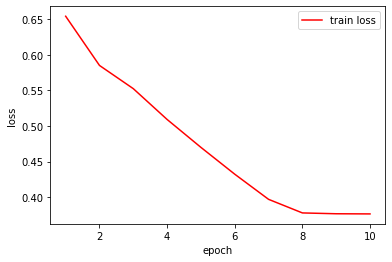

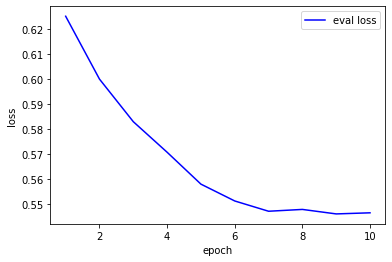

In [ ]:
context_train = np.load("hell_npy_val/context_train1.npy")
context_test = np.load("hell_npy_val/context_test1.npy")
file_train = np.load("hell_npy_val/file_train1.npy")
file_test = np.load("hell_npy_val/file_test1.npy")
number_train = np.load("hell_npy_val/number_train1.npy")
number_test = np.load("hell_npy_val/number_test1.npy")

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from PIL import Image
# normalize = transforms.Normalize(
#     mean=[0.485, 0.456, 0.406],
#     std=[0.229, 0.224, 0.225]
# )
preprocess = transforms.Compose([
            transforms.Resize((256,256) ),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])

def default_loader(path):
    img_pil =  Image.open(path)
    # img_pil = img_pil.resize((224,224))
    img_tensor = preprocess(img_pil)
    return img_tensor

#tensor
class trainset(Dataset):
    def __init__(self, loader=default_loader):
        #定義 image 的路徑
        self.images = file_train
        self.target = number_train
        self.context = context_train
        self.loader = loader

    def __getitem__(self, index):
        fn = self.images[index]
        img = self.loader(fn)
        target = self.target[index]
        context = self.context[index]
        return img,target,context

    def __len__(self):
        return len(self.images)
class testset(Dataset):
    def __init__(self, loader=default_loader):
        #定義 image 的路徑
        self.images = file_test
        self.target = number_test
        self.context = context_test
        self.loader = loader

    def __getitem__(self, index):
        fn = self.images[index]
        img = self.loader(fn)
        target = self.target[index]
        context = self.context[index]
        return img,target,context

    def __len__(self):
        return len(self.images)
train_data  = trainset()
test_data = testset()




def main():
    num_workers = 2
    momentum = 0.9
    num_epochs = 10
    lr = 0.001
    batch_size = 32
    data_transforms = {
        'train': transforms.Compose([
            transforms.Resize((256,256) ),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
        'val': transforms.Compose([
            transforms.Resize((256,256) ),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
    }

    data_dir = './training'
    # trainloader = DataLoader(train_data, batch_size=4,shuffle=True)
    # image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),data_transforms[x])for x in ['train', 'val']}
    # print(train_data)
  
    dataloaders = {x: torch.utils.data.DataLoader(train_data if x=='train' else test_data, batch_size=batch_size,
                                                  shuffle=True, num_workers=2)
                  for x in ['train', 'val']}
    dataset_sizes = {x: len(train_data) if x=='train' else len(test_data)  for x in ['train', 'val']}
    # for inputs, labels ,a in dataloaders['train']:
    #   print(a)

    # print(dataloaders['train'])
    # class_names = image_datasets['train'].classes
    # txt1 = './label.txt'#圖片檔名存放txt檔案地址
    # f1 = open(txt1, 'w+',encoding='utf-8-sig')
    # for n in class_names:
    #   f1.write(n)
    #   f1.write("\n")#換行
    # f1.close()
    # print(class_names)

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(device)
    # Get a batch of training data
    inputs, classes ,_= next(iter(dataloaders['train']))

    # Make a grid from batch
    out = torchvision.utils.make_grid(inputs)

    #imshow(out, title=[class_names[x] for x in classes])
    pretrained_dict = models.resnet50(pretrained=True).state_dict()
    model_ft = HELLMEMECLASS(Bottleneck, [3, 4, 6, 3])
    model_dict = model_ft.state_dict()
  
    # 1. filter out unnecessary keys
    pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict if (k in model_dict and 'fc' not in k)}
    # 2. overwrite entries in the existing state dict
    model_dict.update(pretrained_dict) 
    # 3. load the new state dict
    model_ft.load_state_dict(model_dict)

    # for k,v in model_dict.items():
    #   print(k)
    # for (name, layer) in model_ft._modules.items():
    #     #iteration over outer layers
    #     print(f"{name}:\n{layer}\n")

    model_ft = model_ft.to(device)
    
    
    # model =======================================================================

    parameter_count = count_parameters(model_ft)
    print(f"#parameters:{parameter_count}")
    print(f"batch_size:{batch_size}")


    criterion = nn.CrossEntropyLoss()

    # Observe that all parameters are being optimized
    optimizer_ft = optim.SGD(model_ft.parameters(), lr=lr, momentum=momentum)

    # Decay LR by a factor of 0.1 every 7 epochs
    exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

    model_ft = train_model(
      model_ft, 
      criterion, 
      device, 
      dataloaders, 
      dataset_sizes, 
      optimizer_ft, 
      exp_lr_scheduler,     
      num_epochs=num_epochs
    )

    # visualize_model(model_ft, device, dataloaders, class_names)

 


if __name__ == '__main__':
    main()
 



Validation2
------------------------------------


cuda:0


/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


#parameters:24072234
batch_size:32
Epoch 1/10
----------
train Loss: 0.6538 Acc: 0.6390
val Loss: 0.6229 Acc: 0.6967
TP88.0 TN121.0 FP49.0 FN42.0
accuracy0.6966666666666667
precision:0.6423357664233577
recall:0.676923076923077
F1:0.6591760299625468
Epoch 2/10
----------
train Loss: 0.5932 Acc: 0.7282
val Loss: 0.5917 Acc: 0.7100
TP89.0 TN124.0 FP46.0 FN41.0
accuracy0.71
precision:0.6592592592592592
recall:0.6846153846153846
F1:0.6716981132075471
Epoch 3/10
----------
train Loss: 0.5571 Acc: 0.7727
val Loss: 0.5793 Acc: 0.7167
TP79.0 TN136.0 FP34.0 FN51.0
accuracy0.7166666666666667
precision:0.6991150442477876
recall:0.6076923076923076
F1:0.6502057613168725
Epoch 4/10
----------
train Loss: 0.5096 Acc: 0.8422
val Loss: 0.5746 Acc: 0.7200
TP95.0 TN121.0 FP49.0 FN35.0
accuracy0.72
precision:0.6597222222222222
recall:0.7307692307692307
F1:0.6934306569343066
Epoch 5/10
----------
train Loss: 0.4733 Acc: 0.8797
val Loss: 0.5685 Acc: 0.7167
TP97.0 TN118.0 FP52.0 FN33.0
accuracy0.7166666666666

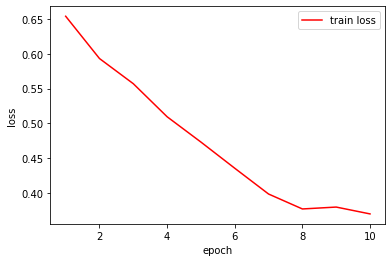

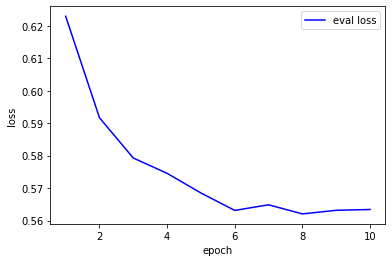

In [ ]:
context_train = np.load("hell_npy_val/context_train2.npy")
context_test = np.load("hell_npy_val/context_test2.npy")
file_train = np.load("hell_npy_val/file_train2.npy")
file_test = np.load("hell_npy_val/file_test2.npy")
number_train = np.load("hell_npy_val/number_train2.npy")
number_test = np.load("hell_npy_val/number_test2.npy")

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from PIL import Image
# normalize = transforms.Normalize(
#     mean=[0.485, 0.456, 0.406],
#     std=[0.229, 0.224, 0.225]
# )
preprocess = transforms.Compose([
            transforms.Resize((256,256) ),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])

def default_loader(path):
    img_pil =  Image.open(path)
    # img_pil = img_pil.resize((224,224))
    img_tensor = preprocess(img_pil)
    return img_tensor

#tensor
class trainset(Dataset):
    def __init__(self, loader=default_loader):
        #定義 image 的路徑
        self.images = file_train
        self.target = number_train
        self.context = context_train
        self.loader = loader

    def __getitem__(self, index):
        fn = self.images[index]
        img = self.loader(fn)
        target = self.target[index]
        context = self.context[index]
        return img,target,context

    def __len__(self):
        return len(self.images)
class testset(Dataset):
    def __init__(self, loader=default_loader):
        #定義 image 的路徑
        self.images = file_test
        self.target = number_test
        self.context = context_test
        self.loader = loader

    def __getitem__(self, index):
        fn = self.images[index]
        img = self.loader(fn)
        target = self.target[index]
        context = self.context[index]
        return img,target,context

    def __len__(self):
        return len(self.images)
train_data  = trainset()
test_data = testset()




def main():
    num_workers = 2
    momentum = 0.9
    num_epochs = 10
    lr = 0.001
    batch_size = 32
    data_transforms = {
        'train': transforms.Compose([
            transforms.Resize((256,256) ),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
        'val': transforms.Compose([
            transforms.Resize((256,256) ),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
    }

    data_dir = './training'
    # trainloader = DataLoader(train_data, batch_size=4,shuffle=True)
    # image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),data_transforms[x])for x in ['train', 'val']}
    # print(train_data)
  
    dataloaders = {x: torch.utils.data.DataLoader(train_data if x=='train' else test_data, batch_size=batch_size,
                                                  shuffle=True, num_workers=2)
                  for x in ['train', 'val']}
    dataset_sizes = {x: len(train_data) if x=='train' else len(test_data)  for x in ['train', 'val']}
    # for inputs, labels ,a in dataloaders['train']:
    #   print(a)

    # print(dataloaders['train'])
    # class_names = image_datasets['train'].classes
    # txt1 = './label.txt'#圖片檔名存放txt檔案地址
    # f1 = open(txt1, 'w+',encoding='utf-8-sig')
    # for n in class_names:
    #   f1.write(n)
    #   f1.write("\n")#換行
    # f1.close()
    # print(class_names)

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(device)
    # Get a batch of training data
    inputs, classes ,_= next(iter(dataloaders['train']))

    # Make a grid from batch
    out = torchvision.utils.make_grid(inputs)

    #imshow(out, title=[class_names[x] for x in classes])
    pretrained_dict = models.resnet50(pretrained=True).state_dict()
    model_ft = HELLMEMECLASS(Bottleneck, [3, 4, 6, 3])
    model_dict = model_ft.state_dict()
  
    # 1. filter out unnecessary keys
    pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict if (k in model_dict and 'fc' not in k)}
    # 2. overwrite entries in the existing state dict
    model_dict.update(pretrained_dict) 
    # 3. load the new state dict
    model_ft.load_state_dict(model_dict)

    # for k,v in model_dict.items():
    #   print(k)
    # for (name, layer) in model_ft._modules.items():
    #     #iteration over outer layers
    #     print(f"{name}:\n{layer}\n")

    model_ft = model_ft.to(device)
    
    
    # model =======================================================================

    parameter_count = count_parameters(model_ft)
    print(f"#parameters:{parameter_count}")
    print(f"batch_size:{batch_size}")


    criterion = nn.CrossEntropyLoss()

    # Observe that all parameters are being optimized
    optimizer_ft = optim.SGD(model_ft.parameters(), lr=lr, momentum=momentum)

    # Decay LR by a factor of 0.1 every 7 epochs
    exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

    model_ft = train_model(
      model_ft, 
      criterion, 
      device, 
      dataloaders, 
      dataset_sizes, 
      optimizer_ft, 
      exp_lr_scheduler,     
      num_epochs=num_epochs
    )

    # visualize_model(model_ft, device, dataloaders, class_names)

 


if __name__ == '__main__':
    main()
 


Validation3
------------------------------------

cuda:0


/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


#parameters:24072234
batch_size:32
Epoch 1/10
----------
train Loss: 0.6504 Acc: 0.6355
val Loss: 0.6155 Acc: 0.7267
TP98.0 TN120.0 FP46.0 FN36.0
accuracy0.7266666666666667
precision:0.6805555555555556
recall:0.7313432835820896
F1:0.7050359712230215
Epoch 2/10
----------
train Loss: 0.5850 Acc: 0.7308
val Loss: 0.5872 Acc: 0.7167
TP98.0 TN117.0 FP49.0 FN36.0
accuracy0.7166666666666667
precision:0.6666666666666666
recall:0.7313432835820896
F1:0.697508896797153
Epoch 3/10
----------
train Loss: 0.5543 Acc: 0.7763
val Loss: 0.5778 Acc: 0.7200
TP103.0 TN113.0 FP53.0 FN31.0
accuracy0.72
precision:0.6602564102564102
recall:0.7686567164179104
F1:0.7103448275862069
Epoch 4/10
----------
train Loss: 0.5118 Acc: 0.8360
val Loss: 0.5649 Acc: 0.7500
TP102.0 TN123.0 FP43.0 FN32.0
accuracy0.75
precision:0.7034482758620689
recall:0.7611940298507462
F1:0.7311827956989247
Epoch 5/10
----------
train Loss: 0.4697 Acc: 0.8788
val Loss: 0.5594 Acc: 0.7500
TP100.0 TN125.0 FP41.0 FN34.0
accuracy0.75
precisi

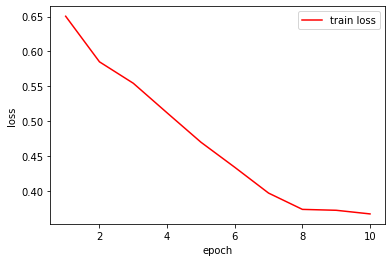

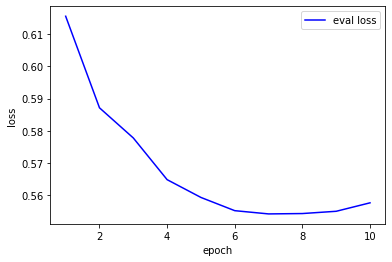

In [ ]:
context_train = np.load("hell_npy_val/context_train3.npy")
context_test = np.load("hell_npy_val/context_test3.npy")
file_train = np.load("hell_npy_val/file_train3.npy")
file_test = np.load("hell_npy_val/file_test3.npy")
number_train = np.load("hell_npy_val/number_train3.npy")
number_test = np.load("hell_npy_val/number_test3.npy")

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from PIL import Image
# normalize = transforms.Normalize(
#     mean=[0.485, 0.456, 0.406],
#     std=[0.229, 0.224, 0.225]
# )
preprocess = transforms.Compose([
            transforms.Resize((256,256) ),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])

def default_loader(path):
    img_pil =  Image.open(path)
    # img_pil = img_pil.resize((224,224))
    img_tensor = preprocess(img_pil)
    return img_tensor

#tensor
class trainset(Dataset):
    def __init__(self, loader=default_loader):
        #定義 image 的路徑
        self.images = file_train
        self.target = number_train
        self.context = context_train
        self.loader = loader

    def __getitem__(self, index):
        fn = self.images[index]
        img = self.loader(fn)
        target = self.target[index]
        context = self.context[index]
        return img,target,context

    def __len__(self):
        return len(self.images)
class testset(Dataset):
    def __init__(self, loader=default_loader):
        #定義 image 的路徑
        self.images = file_test
        self.target = number_test
        self.context = context_test
        self.loader = loader

    def __getitem__(self, index):
        fn = self.images[index]
        img = self.loader(fn)
        target = self.target[index]
        context = self.context[index]
        return img,target,context

    def __len__(self):
        return len(self.images)
train_data  = trainset()
test_data = testset()




def main():
    num_workers = 2
    momentum = 0.9
    num_epochs = 10
    lr = 0.001
    batch_size = 32
    data_transforms = {
        'train': transforms.Compose([
            transforms.Resize((256,256) ),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
        'val': transforms.Compose([
            transforms.Resize((256,256) ),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
    }

    data_dir = './training'
    # trainloader = DataLoader(train_data, batch_size=4,shuffle=True)
    # image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),data_transforms[x])for x in ['train', 'val']}
    # print(train_data)
  
    dataloaders = {x: torch.utils.data.DataLoader(train_data if x=='train' else test_data, batch_size=batch_size,
                                                  shuffle=True, num_workers=2)
                  for x in ['train', 'val']}
    dataset_sizes = {x: len(train_data) if x=='train' else len(test_data)  for x in ['train', 'val']}
    # for inputs, labels ,a in dataloaders['train']:
    #   print(a)

    # print(dataloaders['train'])
    # class_names = image_datasets['train'].classes
    # txt1 = './label.txt'#圖片檔名存放txt檔案地址
    # f1 = open(txt1, 'w+',encoding='utf-8-sig')
    # for n in class_names:
    #   f1.write(n)
    #   f1.write("\n")#換行
    # f1.close()
    # print(class_names)

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(device)
    # Get a batch of training data
    inputs, classes ,_= next(iter(dataloaders['train']))

    # Make a grid from batch
    out = torchvision.utils.make_grid(inputs)

    #imshow(out, title=[class_names[x] for x in classes])
    pretrained_dict = models.resnet50(pretrained=True).state_dict()
    model_ft = HELLMEMECLASS(Bottleneck, [3, 4, 6, 3])
    model_dict = model_ft.state_dict()
  
    # 1. filter out unnecessary keys
    pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict if (k in model_dict and 'fc' not in k)}
    # 2. overwrite entries in the existing state dict
    model_dict.update(pretrained_dict) 
    # 3. load the new state dict
    model_ft.load_state_dict(model_dict)

    # for k,v in model_dict.items():
    #   print(k)
    # for (name, layer) in model_ft._modules.items():
    #     #iteration over outer layers
    #     print(f"{name}:\n{layer}\n")

    model_ft = model_ft.to(device)
    
    
    # model =======================================================================

    parameter_count = count_parameters(model_ft)
    print(f"#parameters:{parameter_count}")
    print(f"batch_size:{batch_size}")


    criterion = nn.CrossEntropyLoss()

    # Observe that all parameters are being optimized
    optimizer_ft = optim.SGD(model_ft.parameters(), lr=lr, momentum=momentum)

    # Decay LR by a factor of 0.1 every 7 epochs
    exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

    model_ft = train_model(
      model_ft, 
      criterion, 
      device, 
      dataloaders, 
      dataset_sizes, 
      optimizer_ft, 
      exp_lr_scheduler,     
      num_epochs=num_epochs
    )

    # visualize_model(model_ft, device, dataloaders, class_names)

 


if __name__ == '__main__':
    main()
 


Validation4
------------------------------------

cuda:0


/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


#parameters:24072234
batch_size:32
Epoch 1/10
----------
train Loss: 0.6725 Acc: 0.5660
val Loss: 0.6349 Acc: 0.6800
TP77.0 TN127.0 FP41.0 FN55.0
accuracy0.68
precision:0.652542372881356
recall:0.5833333333333334
F1:0.616
Epoch 2/10
----------
train Loss: 0.5960 Acc: 0.7344
val Loss: 0.6015 Acc: 0.7067
TP93.0 TN119.0 FP49.0 FN39.0
accuracy0.7066666666666667
precision:0.6549295774647887
recall:0.7045454545454546
F1:0.6788321167883211
Epoch 3/10
----------
train Loss: 0.5600 Acc: 0.7807
val Loss: 0.5901 Acc: 0.7000
TP92.0 TN118.0 FP50.0 FN40.0
accuracy0.7
precision:0.647887323943662
recall:0.696969696969697
F1:0.6715328467153284
Epoch 4/10
----------
train Loss: 0.5204 Acc: 0.8360
val Loss: 0.5771 Acc: 0.7367
TP87.0 TN134.0 FP34.0 FN45.0
accuracy0.7366666666666667
precision:0.71900826446281
recall:0.6590909090909091
F1:0.6877470355731226
Epoch 5/10
----------
train Loss: 0.4818 Acc: 0.8832
val Loss: 0.5746 Acc: 0.7167
TP102.0 TN113.0 FP55.0 FN30.0
accuracy0.7166666666666667
precision:0.6

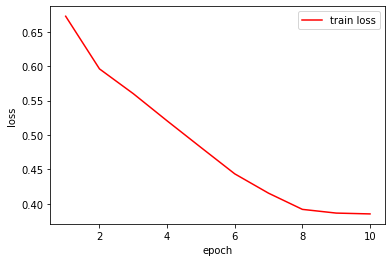

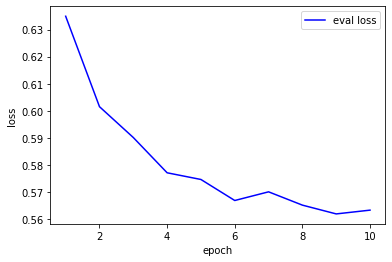

In [ ]:
context_train = np.load("hell_npy_val/context_train4.npy")
context_test = np.load("hell_npy_val/context_test4.npy")
file_train = np.load("hell_npy_val/file_train4.npy")
file_test = np.load("hell_npy_val/file_test4.npy")
number_train = np.load("hell_npy_val/number_train4.npy")
number_test = np.load("hell_npy_val/number_test4.npy")

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from PIL import Image
# normalize = transforms.Normalize(
#     mean=[0.485, 0.456, 0.406],
#     std=[0.229, 0.224, 0.225]
# )
preprocess = transforms.Compose([
            transforms.Resize((256,256) ),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])

def default_loader(path):
    img_pil =  Image.open(path)
    # img_pil = img_pil.resize((224,224))
    img_tensor = preprocess(img_pil)
    return img_tensor

#tensor
class trainset(Dataset):
    def __init__(self, loader=default_loader):
        #定義 image 的路徑
        self.images = file_train
        self.target = number_train
        self.context = context_train
        self.loader = loader

    def __getitem__(self, index):
        fn = self.images[index]
        img = self.loader(fn)
        target = self.target[index]
        context = self.context[index]
        return img,target,context

    def __len__(self):
        return len(self.images)
class testset(Dataset):
    def __init__(self, loader=default_loader):
        #定義 image 的路徑
        self.images = file_test
        self.target = number_test
        self.context = context_test
        self.loader = loader

    def __getitem__(self, index):
        fn = self.images[index]
        img = self.loader(fn)
        target = self.target[index]
        context = self.context[index]
        return img,target,context

    def __len__(self):
        return len(self.images)
train_data  = trainset()
test_data = testset()




def main():
    num_workers = 2
    momentum = 0.9
    num_epochs = 10
    lr = 0.001
    batch_size = 32
    data_transforms = {
        'train': transforms.Compose([
            transforms.Resize((256,256) ),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
        'val': transforms.Compose([
            transforms.Resize((256,256) ),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
    }

    data_dir = './training'
    # trainloader = DataLoader(train_data, batch_size=4,shuffle=True)
    # image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),data_transforms[x])for x in ['train', 'val']}
    # print(train_data)
  
    dataloaders = {x: torch.utils.data.DataLoader(train_data if x=='train' else test_data, batch_size=batch_size,
                                                  shuffle=True, num_workers=2)
                  for x in ['train', 'val']}
    dataset_sizes = {x: len(train_data) if x=='train' else len(test_data)  for x in ['train', 'val']}
    # for inputs, labels ,a in dataloaders['train']:
    #   print(a)

    # print(dataloaders['train'])
    # class_names = image_datasets['train'].classes
    # txt1 = './label.txt'#圖片檔名存放txt檔案地址
    # f1 = open(txt1, 'w+',encoding='utf-8-sig')
    # for n in class_names:
    #   f1.write(n)
    #   f1.write("\n")#換行
    # f1.close()
    # print(class_names)

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(device)
    # Get a batch of training data
    inputs, classes ,_= next(iter(dataloaders['train']))

    # Make a grid from batch
    out = torchvision.utils.make_grid(inputs)

    #imshow(out, title=[class_names[x] for x in classes])
    pretrained_dict = models.resnet50(pretrained=True).state_dict()
    model_ft = HELLMEMECLASS(Bottleneck, [3, 4, 6, 3])
    model_dict = model_ft.state_dict()
  
    # 1. filter out unnecessary keys
    pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict if (k in model_dict and 'fc' not in k)}
    # 2. overwrite entries in the existing state dict
    model_dict.update(pretrained_dict) 
    # 3. load the new state dict
    model_ft.load_state_dict(model_dict)

    # for k,v in model_dict.items():
    #   print(k)
    # for (name, layer) in model_ft._modules.items():
    #     #iteration over outer layers
    #     print(f"{name}:\n{layer}\n")

    model_ft = model_ft.to(device)
    
    
    # model =======================================================================

    parameter_count = count_parameters(model_ft)
    print(f"#parameters:{parameter_count}")
    print(f"batch_size:{batch_size}")


    criterion = nn.CrossEntropyLoss()

    # Observe that all parameters are being optimized
    optimizer_ft = optim.SGD(model_ft.parameters(), lr=lr, momentum=momentum)

    # Decay LR by a factor of 0.1 every 7 epochs
    exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

    model_ft = train_model(
      model_ft, 
      criterion, 
      device, 
      dataloaders, 
      dataset_sizes, 
      optimizer_ft, 
      exp_lr_scheduler,     
      num_epochs=num_epochs
    )

    # visualize_model(model_ft, device, dataloaders, class_names)

 


if __name__ == '__main__':
    main()
 


Validation5
------------------------------------

cuda:0


/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


#parameters:24072234
batch_size:32
Epoch 1/10
----------
train Loss: 0.6520 Acc: 0.6319
val Loss: 0.6306 Acc: 0.6700
TP91.0 TN110.0 FP59.0 FN40.0
accuracy0.67
precision:0.6066666666666667
recall:0.6946564885496184
F1:0.6476868327402135
Epoch 2/10
----------
train Loss: 0.5838 Acc: 0.7255
val Loss: 0.6022 Acc: 0.6800
TP90.0 TN114.0 FP55.0 FN41.0
accuracy0.68
precision:0.6206896551724138
recall:0.6870229007633588
F1:0.6521739130434783
Epoch 3/10
----------
train Loss: 0.5501 Acc: 0.7843
val Loss: 0.5927 Acc: 0.7133
TP105.0 TN109.0 FP60.0 FN26.0
accuracy0.7133333333333334
precision:0.6363636363636364
recall:0.8015267175572519
F1:0.7094594594594594
Epoch 4/10
----------
train Loss: 0.5239 Acc: 0.8075
val Loss: 0.5934 Acc: 0.6967
TP103.0 TN106.0 FP63.0 FN28.0
accuracy0.6966666666666667
precision:0.6204819277108434
recall:0.7862595419847328
F1:0.6936026936026936
Epoch 5/10
----------
train Loss: 0.4848 Acc: 0.8752
val Loss: 0.5774 Acc: 0.7200
TP96.0 TN120.0 FP49.0 FN35.0
accuracy0.72
precisi

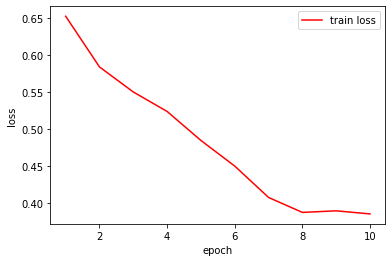

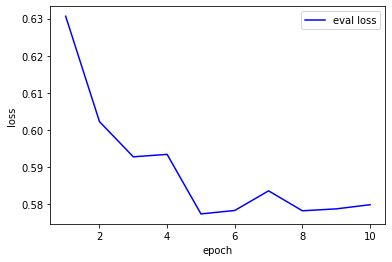

In [ ]:
context_train = np.load("hell_npy_val/context_train5.npy")
context_test = np.load("hell_npy_val/context_test5.npy")
file_train = np.load("hell_npy_val/file_train5.npy")
file_test = np.load("hell_npy_val/file_test5.npy")
number_train = np.load("hell_npy_val/number_train5.npy")
number_test = np.load("hell_npy_val/number_test5.npy")

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from PIL import Image
# normalize = transforms.Normalize(
#     mean=[0.485, 0.456, 0.406],
#     std=[0.229, 0.224, 0.225]
# )
preprocess = transforms.Compose([
            transforms.Resize((256,256) ),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])

def default_loader(path):
    img_pil =  Image.open(path)
    # img_pil = img_pil.resize((224,224))
    img_tensor = preprocess(img_pil)
    return img_tensor

#tensor
class trainset(Dataset):
    def __init__(self, loader=default_loader):
        #定義 image 的路徑
        self.images = file_train
        self.target = number_train
        self.context = context_train
        self.loader = loader

    def __getitem__(self, index):
        fn = self.images[index]
        img = self.loader(fn)
        target = self.target[index]
        context = self.context[index]
        return img,target,context

    def __len__(self):
        return len(self.images)
class testset(Dataset):
    def __init__(self, loader=default_loader):
        #定義 image 的路徑
        self.images = file_test
        self.target = number_test
        self.context = context_test
        self.loader = loader

    def __getitem__(self, index):
        fn = self.images[index]
        img = self.loader(fn)
        target = self.target[index]
        context = self.context[index]
        return img,target,context

    def __len__(self):
        return len(self.images)
train_data  = trainset()
test_data = testset()




def main():
    num_workers = 2
    momentum = 0.9
    num_epochs = 10
    lr = 0.001
    batch_size = 32
    data_transforms = {
        'train': transforms.Compose([
            transforms.Resize((256,256) ),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
        'val': transforms.Compose([
            transforms.Resize((256,256) ),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
    }

    data_dir = './training'
    # trainloader = DataLoader(train_data, batch_size=4,shuffle=True)
    # image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),data_transforms[x])for x in ['train', 'val']}
    # print(train_data)
  
    dataloaders = {x: torch.utils.data.DataLoader(train_data if x=='train' else test_data, batch_size=batch_size,
                                                  shuffle=True, num_workers=2)
                  for x in ['train', 'val']}
    dataset_sizes = {x: len(train_data) if x=='train' else len(test_data)  for x in ['train', 'val']}
    # for inputs, labels ,a in dataloaders['train']:
    #   print(a)

    # print(dataloaders['train'])
    # class_names = image_datasets['train'].classes
    # txt1 = './label.txt'#圖片檔名存放txt檔案地址
    # f1 = open(txt1, 'w+',encoding='utf-8-sig')
    # for n in class_names:
    #   f1.write(n)
    #   f1.write("\n")#換行
    # f1.close()
    # print(class_names)

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(device)
    # Get a batch of training data
    inputs, classes ,_= next(iter(dataloaders['train']))

    # Make a grid from batch
    out = torchvision.utils.make_grid(inputs)

    #imshow(out, title=[class_names[x] for x in classes])
    pretrained_dict = models.resnet50(pretrained=True).state_dict()
    model_ft = HELLMEMECLASS(Bottleneck, [3, 4, 6, 3])
    model_dict = model_ft.state_dict()
  
    # 1. filter out unnecessary keys
    pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict if (k in model_dict and 'fc' not in k)}
    # 2. overwrite entries in the existing state dict
    model_dict.update(pretrained_dict) 
    # 3. load the new state dict
    model_ft.load_state_dict(model_dict)

    # for k,v in model_dict.items():
    #   print(k)
    # for (name, layer) in model_ft._modules.items():
    #     #iteration over outer layers
    #     print(f"{name}:\n{layer}\n")

    model_ft = model_ft.to(device)
    
    
    # model =======================================================================

    parameter_count = count_parameters(model_ft)
    print(f"#parameters:{parameter_count}")
    print(f"batch_size:{batch_size}")


    criterion = nn.CrossEntropyLoss()

    # Observe that all parameters are being optimized
    optimizer_ft = optim.SGD(model_ft.parameters(), lr=lr, momentum=momentum)

    # Decay LR by a factor of 0.1 every 7 epochs
    exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

    model_ft = train_model(
      model_ft, 
      criterion, 
      device, 
      dataloaders, 
      dataset_sizes, 
      optimizer_ft, 
      exp_lr_scheduler,     
      num_epochs=num_epochs
    )

    # visualize_model(model_ft, device, dataloaders, class_names)

 


if __name__ == '__main__':
    main()
 
